Librairies

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Mount le drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/Challenge2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Challenge2


Lecture et affichage de data

In [ ]:
df_train = pd.read_csv('fake_train.csv')
df_test = pd.read_csv('fake_test.csv')

df_train.head()

,Unnamed: 0,data,label,target_name
0,0,Au 22e jour consécutif de la grève reconductib...,0,News
1,1,"Depuis plusieurs mois, les initiatives des che...",0,News
2,2,Google vient d'introduire une mise à jour de...,0,News
3,3,Portrait. Chacun s’empresse autour d’elle tan...,0,News
4,4,« Il n’y a pas de risque de pénurie » de carbu...,0,News


Données parasites (ces lignes sont supprimés du dataset proposé par les encadrants du projet)
Nous avons retrouvé ces "anomalies" en utilisant les fonctions montré plus bas dans le notebook en utilisant un processus itératif
-	1136 : suite du mot ISLAM.
-	1180 : data en arabe
-	1317 : pas de data.
-	1362 : suite du mot ROUEN.
-	1429 : suite de 1 et 0. 

In [ ]:
df_train.drop([1136, 1180, 1317, 1362, 1429], inplace = True )

Recherche de null et vide dans le data

In [ ]:
df_train.isna().sum()

Unnamed: 0     0
data           0
label          0
target_name    0
dtype: int64

Jeu de données en équilibre ou non? Le jeu de données de départ est assez équilibré

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


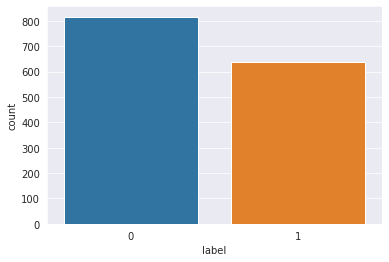

In [ ]:

sns.set_style("darkgrid")
sns.countplot(df_train.label)

Retirer les colonnes inutiles

In [ ]:
df_train = df_train.drop(['Unnamed: 0', 'target_name'], axis = 1)
df_test = df_test.drop(['Unnamed: 0', 'target_name'], axis = 1)

df_train.head()

,data,label
0,Au 22e jour consécutif de la grève reconductib...,0
1,"Depuis plusieurs mois, les initiatives des che...",0
2,Google vient d'introduire une mise à jour de...,0
3,Portrait. Chacun s’empresse autour d’elle tan...,0
4,« Il n’y a pas de risque de pénurie » de carbu...,0


En analysant les données proposées, nous nous sommes rendu compte qu’il s’agissait de News francophones pour les fake et les real. Nous avons alors cherché les sources de ces news grâce à Google. Nous avons vite trouvé les sites-web d’où venaient les textes. Nous avons également trouvé un github où une personne étudiait plus ou moins le même problème que nous. Il a utilisé un scrapper pour extraire tous ces articles des sites-web suivants: 
Pour les Real News:
https://europe1.fr/  
https://20minutes.fr/ 
https://lexpress.fr/ 
https://francetvinfo.fr/ 
https://dhnet.be/ 
https://lefigaro.fr/ 
https://7sur7.be/ 
https://huffingtonpost.fr/ 
https://leparisien.fr/ 
https://lepoint.fr/ 
https://lemonde.fr/ 
https://ladepeche.fr/ 
https://nouvelobs.com/ 
https://rtl.fr/ 
https://lesoir.be/ 
https://france24.com/ 
https://lesechos.fr/ 
https://metronews.fr/ 
https://journaldunet.com/ 
https://rfi.fr/ 
https://sudouest.fr/ 
https://liberation.fr/ 
https://linternaute.com/ 
https://ouest-france.fr/ 
https://rtbf.be/ 
https://rtl.be/ 

Pour les FAKE News:
https://secretnews.fr/
https://www.legorafi.fr/
http://sud-ou-est.fr
https://www.corse-machin.com
https://leouestfranc.com
http://www.radiomogette.com
https://teurgoole.fr
https://lejournalnews.com
http://www.mespropresrecherches.com
https://lamentable.fr
https://www.radiocockpit.fr
https://nordpresse.fr
http://www.bopress.ma
https://raleursactuels.com
https://desavantage.com
https://www.worldtvdesinfo.com
http://lechodelaboucle.fr
https://www.worldtvdesinfo.com
https://limmunite.fr 
https://secretnews.be 
http://nordpresse.be 

Le scrapper de la personne ne fonctionne pas mais nous avons pu retrouver les fichiers contenant le résultat. Nous avons parcouru ces fichiers pour s’assurer qu’il n’y a pas de « données parasites ». Par exemple, des pages de contact/information des sites-web. Nous avons supprimé tout cela pour enfin avoir des données nettoyées. Nous avons ensuite appliquer toutes les étapes de visualisation et traitement sur ces données additionnelles. Les changement ont été fait directement dans les fichiers pour ne pas devoir les refaire à chaque fois. Nous avons, dans la plus part des cas, supprimé les lignes où il y avait des anomalies.
Le github : https://github.com/akachbat/FrenchFakeNews 

Il y a également deux fichiers joints pour chaque type de news.


In [ ]:
#Ne pas exécuter cette céllule pour ne pas avoir les nouvelles données 

df_real = pd.read_csv("real_news.csv")
df_fake = pd.read_csv("fake_news.csv")
df_real = df_real.drop(['site', 'url', 'title'], axis = 1)
df_fake = df_fake.drop(['site', 'url', 'title'], axis = 1)
df_real['label'] = 0
df_fake['label'] = 1
df_real.rename(columns = {'text':'data'}, inplace = True)
df_fake.rename(columns = {'text':'data'}, inplace = True)
df_train = df_train.append(df_real, ignore_index = True)
df_train = df_train.append(df_fake, ignore_index = True)

df_train['data'] = df_train['data'].astype(str)
df_test['data'] = df_test['data'].astype(str)

Vérification d'équilibre après ajout. Nous avons un peu plus de real news que fake après l'ajout des données

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


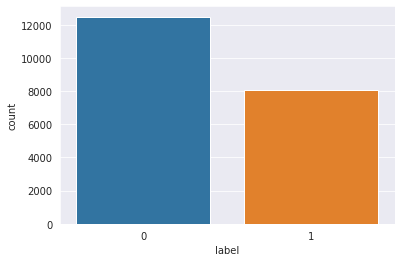

In [ ]:
sns.set_style("darkgrid")
sns.countplot(df_train.label)

Nettoyer le texte en retirant les caractères et mots inutiles.
Le set de stopwords proposé par la librairie nltk n'est pas suffisante pour enlever tous les mots marginaux. Nous avons utilisé les WordCloud(juste après) pour ajouter ces mots dans le set. Il y a également des mots comme "secretnews" qui font référence aux sites de news parodiques. 

In [ ]:
STOPWORDS = set(stopwords.words('french'))
moreStopwords = ['plus', 'comme', 'a', 'il', 'alors','au',
'aucuns','aussi','autre','avant','avec','avoir','bon','car','ce','cela','ces','ceux','chaque','ci',
'comme','comment','dans','des','du','dedans','dehors','depuis','devrait','doit','donc','dos','début',
'elle','elles','en','encore','essai','est','et','eu','fait','faites','fois','font','hors','ici','il',
'ils','je',	'juste','la','le','les','leur','là','ma','maintenant','mais','mes','mien','moins','mon',
'mot','même','ni','nommés','notre','nous','ou','où','par','parce','pas','peut','peu','plupart','pour',
'pourquoi','quand','que','quel','quelle','quelles','quels','qui','sa','sans','ses','seulement','si',
'sien','son','sont','sous','soyez',	'sujet','sur','ta','tandis','tellement','tels','tes','ton','tous',
'tout','trop','très','tu','voient','vont','votre','vous','vu','ça','étaient','état','étions','été','être',
'cette','celle','dont','celui', 'adsbygoogle','window','secretnews','leurs','ainsi','toute','déjà','autres',
'suivre','facebook','twitter','parodique', 'média','collaboratif', 'libre','notamment', 'entre', 'désormais', 'également']

STOPWORDS.update(moreStopwords)
def cleaner(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    text = ' '.join(word for word in text.split() if word not in STOPWORDS)   
    return text

In [ ]:
df_train['data'] = df_train['data'].apply(cleaner)
df_test['data'] = df_test['data'].apply(cleaner)

WordCloud pour voir les mots les plus importants dans les deux types de textes.
Cette étape a été refaite plusieurs fois pour dégager les stopwords 

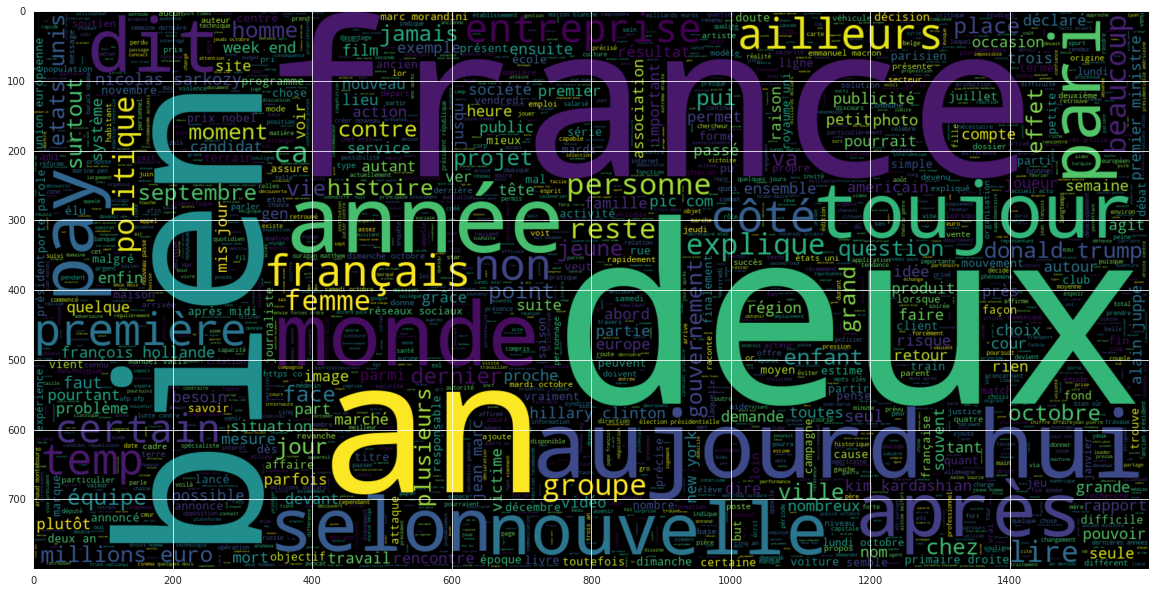

In [ ]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df_train[df_train.label == 0].data))
plt.imshow(wc , interpolation = 'bilinear')

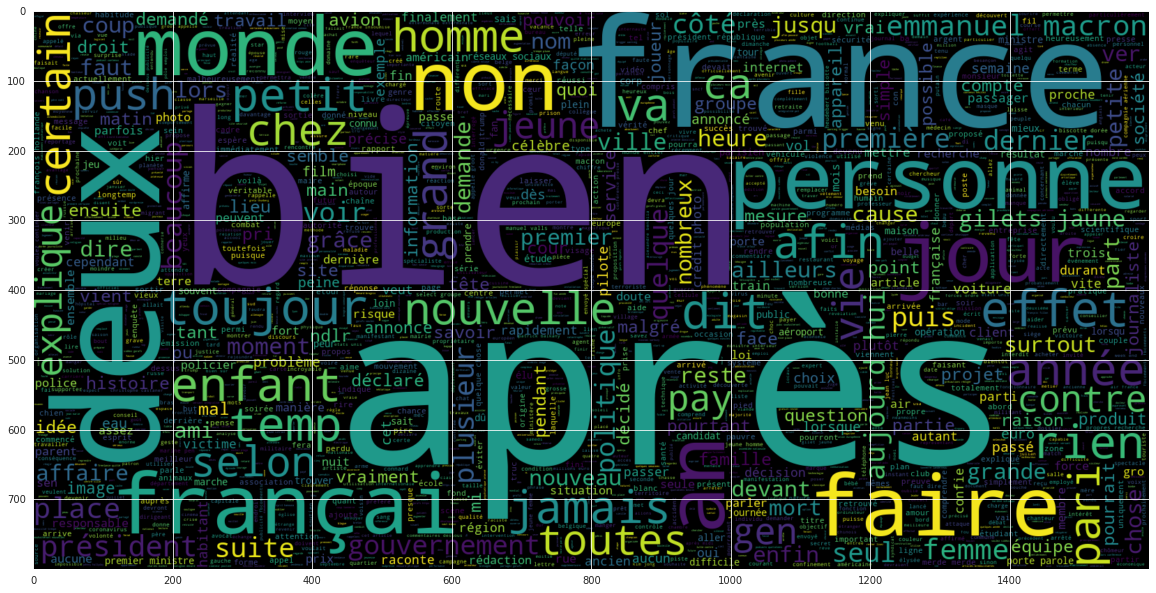

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df_train[df_train.label == 1].data))
plt.imshow(wc , interpolation = 'bilinear')

Nombre de caractères dans chaque type de texte

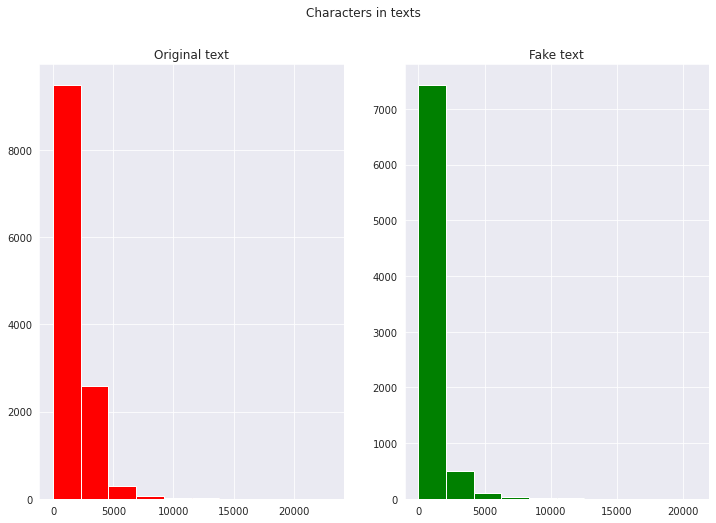

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df_train[df_train['label']==0]['data'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df_train[df_train['label']==1]['data'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

Nombre de mots dans chaque type de texte

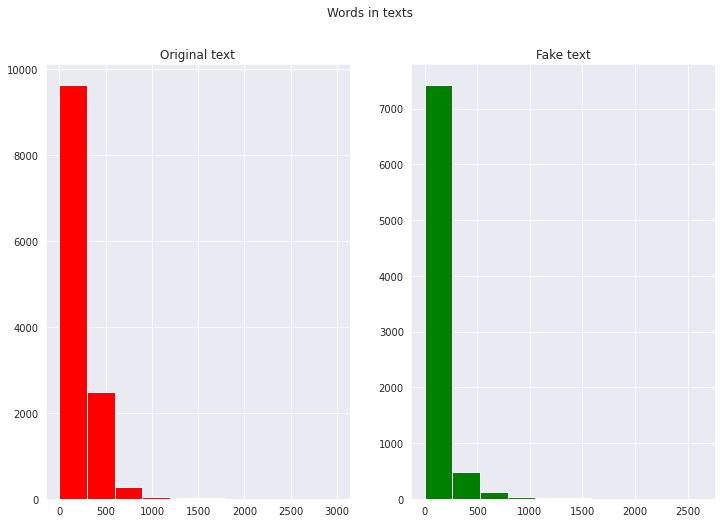

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df_train[df_train['label']==0]['data'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df_train[df_train['label']==1]['data'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

Moyenne de la longueur des mots.
Cette étape a permis de se rendre compte qu'il y avait des fois des mots très longs dans les fakenews. Après recherche, c'était encore des données parasites (dans les données additionnelles) que nous avons supprimées

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.

Text(0.5, 0.98, 'Average word length in each text')

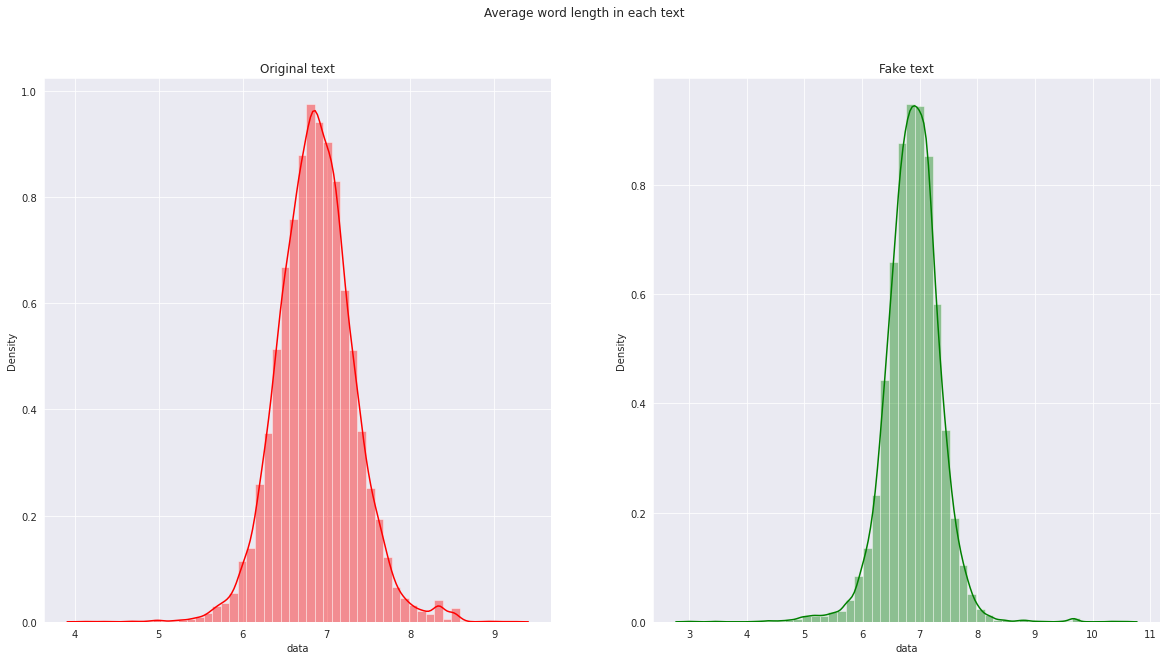

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df_train[df_train['label']==0]['data'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df_train[df_train['label']==1]['data'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

Les mots les plus longs dans les fakes textes (surtout les data additionelles).
Les mots beaucoup trop longs qui ne devaient pas être là sont supprimés également. Ces mots composaient parfois jusqu'à 200 caractères.


In [ ]:
mots = df_train[df_train['label']==1]['data'].str.split()
maxlen=''
for i in mots:
  for j in i:
    if len(j)>len(maxlen):
      maxlen = j
      print(i)
      print(j)

['pouvez', 'dormir', 'deux', 'oreilles', 'petits', 'hommes', 'verts', 'prêts', 'débarquer', 'terre', 'nasa', 'vient', 'valider', 'officiellement', 'système', 'défense', 'extra', 'planétaire', 'mis', 'place', 'année', 'prochaine', 'décourager', 'forme', 'vie', 'extraterrestre', 'approcher', 'planète', 'effet', 'chansons', 'grégoire', 'diffusées', 'boucle', 'aide', 'hauts', 'parleurs', 'géants', 'placés', 'satellites', 'tourneront', 'orbite', 'autour', 'terre', 'selon', 'john', 'andrews', 'chercheur', 'nasa', 'dispositif', 'testé', 'semaine', 'dernière', 'laboratoire', 'souris', 'placées', 'pièce', 'diffusé', 'album', 'roses', 'silence', 'sorti', 'bout', 'minutes', 'souris', 'mangées', 'test', 'pleinement', 'convaincu', 'plusieurs', 'projets', 'étude', 'canons', 'atomiques', 'lasers', 'ultra', 'puissants', 'avérés', 'beaucoup', 'dissuasif', 'musique', 'chanteur', 'français', 'côté', 'entourage', 'artiste', 'maison', 'disque', 'déçue', 'dernières', 'ventes', 'albums', 'poulain', 'proposé'

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df_train.data)

Les mots les plus fréquents. Cette étape a notamment aidé à retrouver la suite du mot "ISLAM" ou "ROUEN".

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'après': 14700,
 'deux': 13420,
 'faire': 12579,
 'ans': 12168,
 'france': 11758,
 'bien': 11591,
 'octobre': 9189,
 'contre': 8660,
 'selon': 8087,
 'président': 7387}

Fonction pour calculer les n-grammes 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Graphique des mots les plus fréquents (unigrammes)

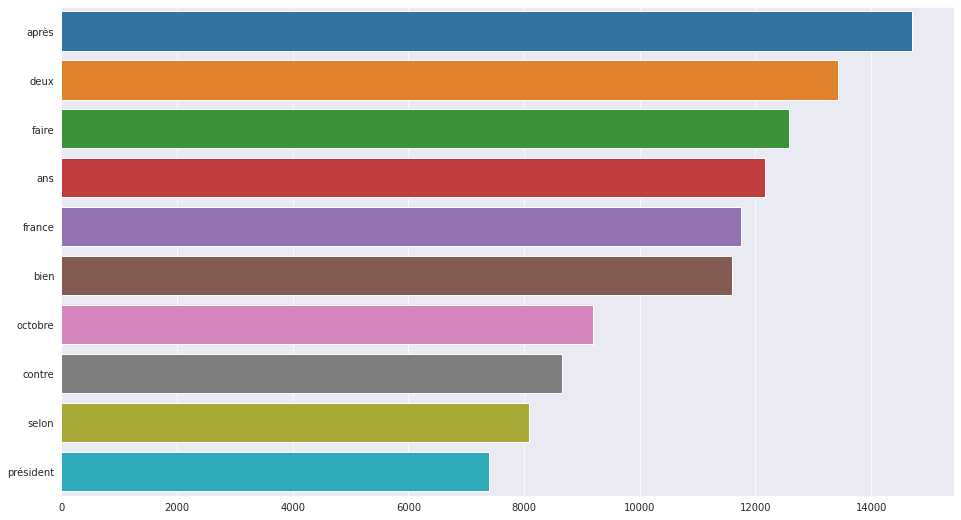

In [ ]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df_train.data,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

Graphiques des bigrammes les plus fréquents.
ça nous a permis de retrouver notamment les suites du mot Islam ou Rouen dans les données

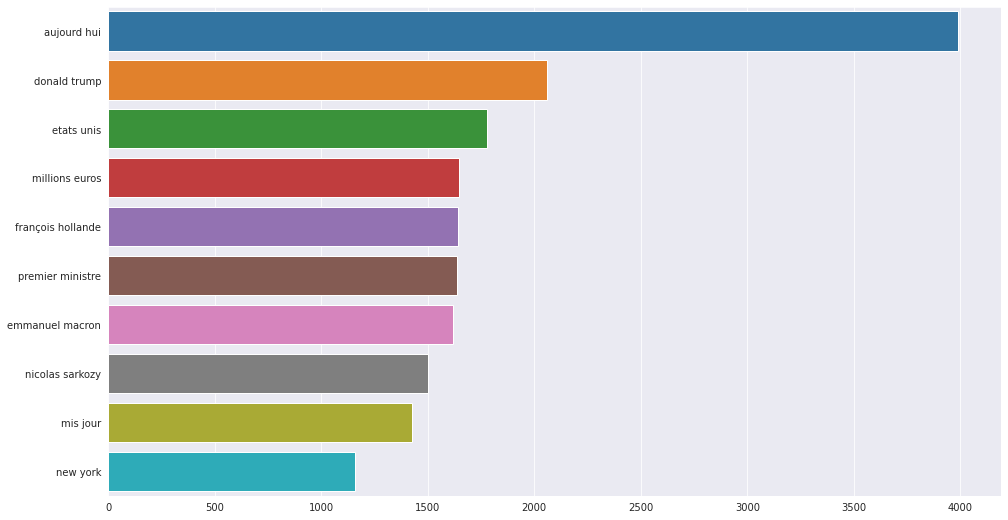

In [ ]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df_train.data,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

Le Trigramme a aidé à retrouvé les données qui ne font pas partie des news. Nous avions, par exemple, la description du site-web secretnews.be, avec l'explication du site-web juste après chaque article. Nous avions donc que ça présent dans nos trigrammes. Nous avons remplacé ces mots par un vide grâce à Excel en utilsiant la commande CTRL+H

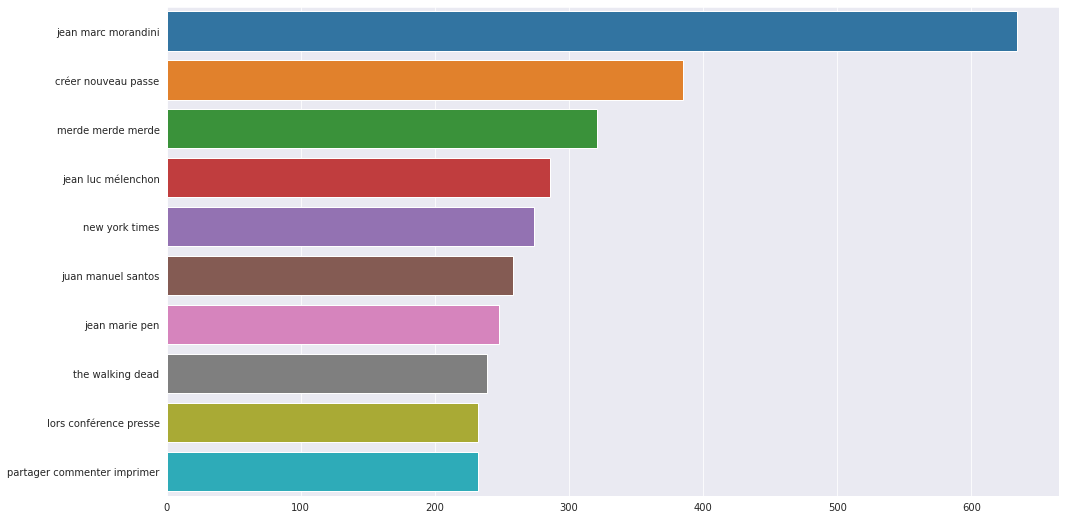

In [ ]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df_train.data,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))